___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import sys

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)
%matplotlib inline

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

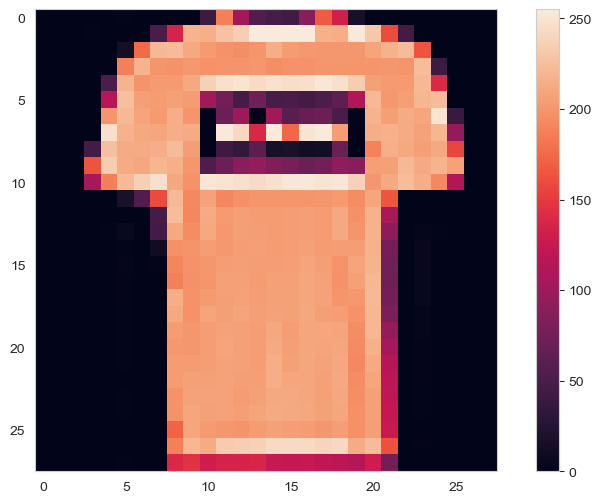

In [5]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [6]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


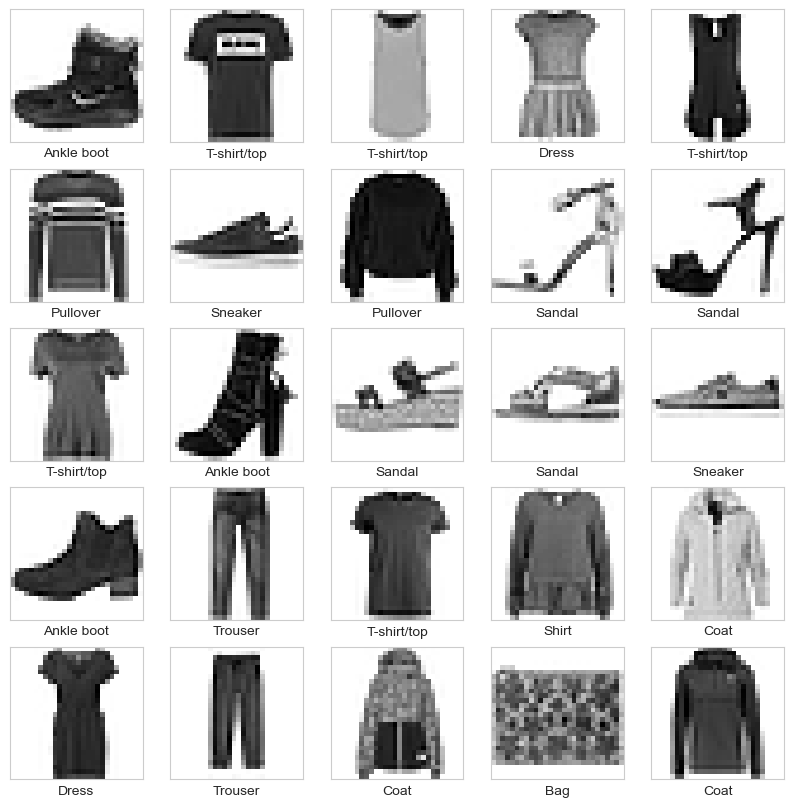

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()


# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [8]:
x_train[9].min(), x_train[9].max()

(0, 255)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255

In [10]:
x_train[9].min(), x_train[9].max()

(0.0, 1.0)

In [11]:
print(x_train[1])

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078432 0.7372549
  0.40392157 0.21176471 0.1882353  0.16862746 0.34117648 0.65882355
  0.52156866 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215687 0.53333336 0.85882354 0.84705883 0.89411765
  0.9254902  1.         1.         1.         1.         0.8509804
  0.84313726 0.99607843 0.90588236 0.627451   0.1764706  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.6901961  0.87058824 0.8784314  0.83137256 0.79607844 0.7764706
  0.76862746 0.78431374 0.84313726 0.8        0.7921569  0.7882353
  0.7882353  0.7882353  0.81960785 0.85490197 0.8784314  0.6431373
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
  0.8

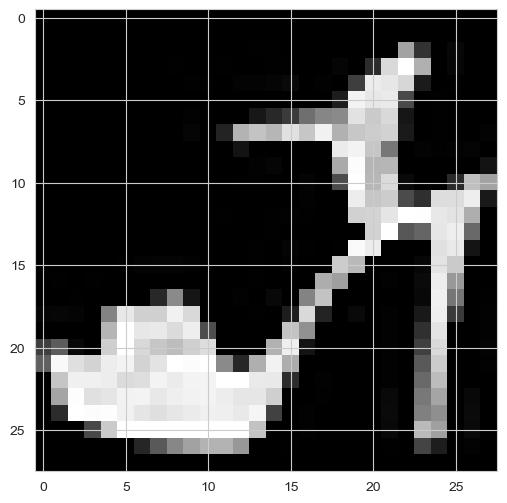

In [12]:
plt.imshow(x_train[9],cmap='gray')


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [13]:
x_train.reshape(60000, 28, 28, 1).shape


(60000, 28, 28, 1)

In [14]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [15]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
y_train, y_train.shape

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), (60000,))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train_c = to_categorical(y_train, 10) 
y_test_c = to_categorical(y_test, 10)
y_train_c.shape, y_test_c.shape

((60000, 10), (10000, 10))

In [19]:
y_train_c[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [20]:
y_train_c[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [23]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) 

model.add(Flatten()) # flatten ile vektörel hale getirip ann yapısına geçiyoruz.

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=4, restore_best_weights = True)


In [27]:
model.fit(x_train, y_train_c, batch_size=32, epochs=100, validation_data=(x_test, y_test_c), callbacks=[early_stop]) 

Epoch 1/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3826 - accuracy: 0.8663 - val_loss: 0.3059 - val_accuracy: 0.8944
Epoch 2/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2558 - accuracy: 0.9084 - val_loss: 0.2765 - val_accuracy: 0.8998
Epoch 3/100
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2172 - accuracy: 0.9227 - val_loss: 0.2695 - val_accuracy: 0.9111
Epoch 4/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1937 - accuracy: 0.9312 - val_loss: 0.2807 - val_accuracy: 0.9094
Epoch 5/100
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1737 - accuracy: 0.9384 - val_loss: 0.2984 - val_accuracy: 0.9085
Epoch 6/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1603 - accuracy: 0.9445 - val_loss: 0.2976 - val_accuracy: 0.9099
Epoch 7/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1451 - accuracy: 0.9507 - val_loss: 0

**TASK 7: Plot values of metrics you used in your model.**

In [28]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.383,0.866,0.306,0.894
1,0.256,0.908,0.277,0.900
2,0.217,0.923,0.270,0.911
3,0.194,0.931,0.281,0.909
4,0.174,0.938,0.298,0.909


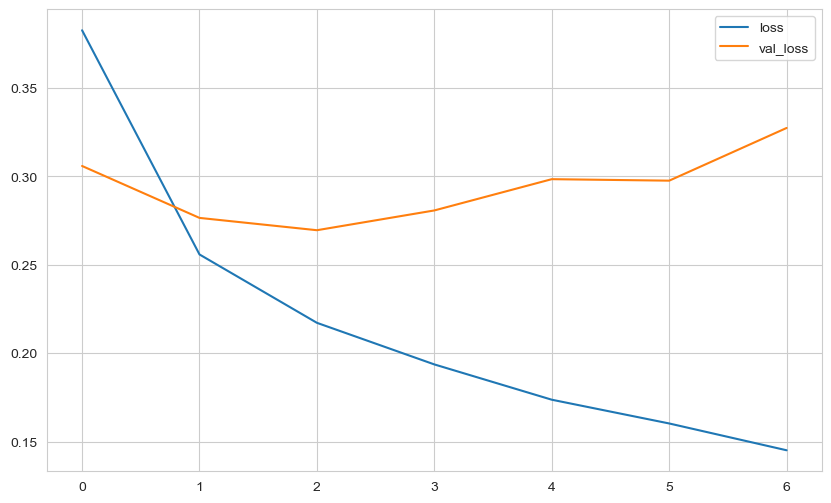

In [29]:
summary[["loss", "val_loss"]].plot();

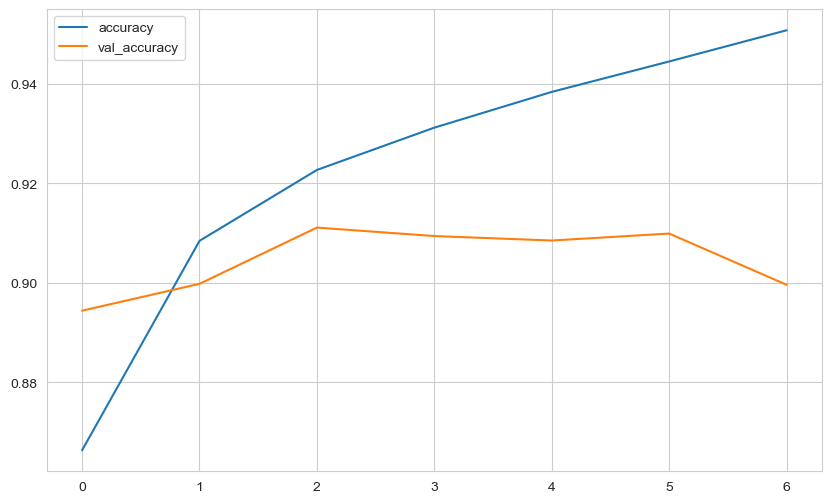

In [30]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [31]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [32]:
model.evaluate(x_test, y_test_c)

313/313 [==============================] - 2s 6ms/step - loss: 0.2695 - accuracy: 0.9111


[0.2695423662662506, 0.9110999703407288]

In [33]:
score = model.evaluate(x_test, y_test_c, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2695423662662506
Test accuracy: 0.9110999703407288


In [34]:
pred_prob = model.predict(x_test)
pred_prob

313/313 [==============================] - 1s 4ms/step


array([[0.00000004, 0.00000001, 0.00000068, ..., 0.0000723 , 0.000001  ,
        0.9998843 ],
       [0.00000231, 0.        , 0.9999971 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00000005, 0.        , 0.00000071, ..., 0.00000009, 0.9999965 ,
        0.        ],
       [0.        , 0.9999998 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00155871, 0.0001903 , 0.00802123, ..., 0.15994917, 0.04693476,
        0.01022964]], dtype=float32)

In [35]:
pred_prob.shape

(10000, 10)

In [36]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [37]:
y_pred.shape

(10000,)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.89      0.84      0.86      1000
           3       0.90      0.93      0.91      1000
           4       0.84      0.89      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.75      0.75      1000
           7       0.95      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [39]:
print(confusion_matrix(y_test, y_pred))

[[864   0  12  14   5   1 101   0   3   0]
 [  1 977   1  14   3   0   3   0   1   0]
 [ 17   0 836   9  73   0  65   0   0   0]
 [ 15   4   9 928  27   0  17   0   0   0]
 [  1   1  31  32 887   1  47   0   0   0]
 [  0   0   0   0   0 976   0  14   0  10]
 [109   0  49  31  58   0 747   0   6   0]
 [  0   0   0   0   0   9   0 962   0  29]
 [  4   1   2   5   1   1   7   4 974   1]
 [  0   0   0   0   0   6   1  33   0 960]]


<Axes: >

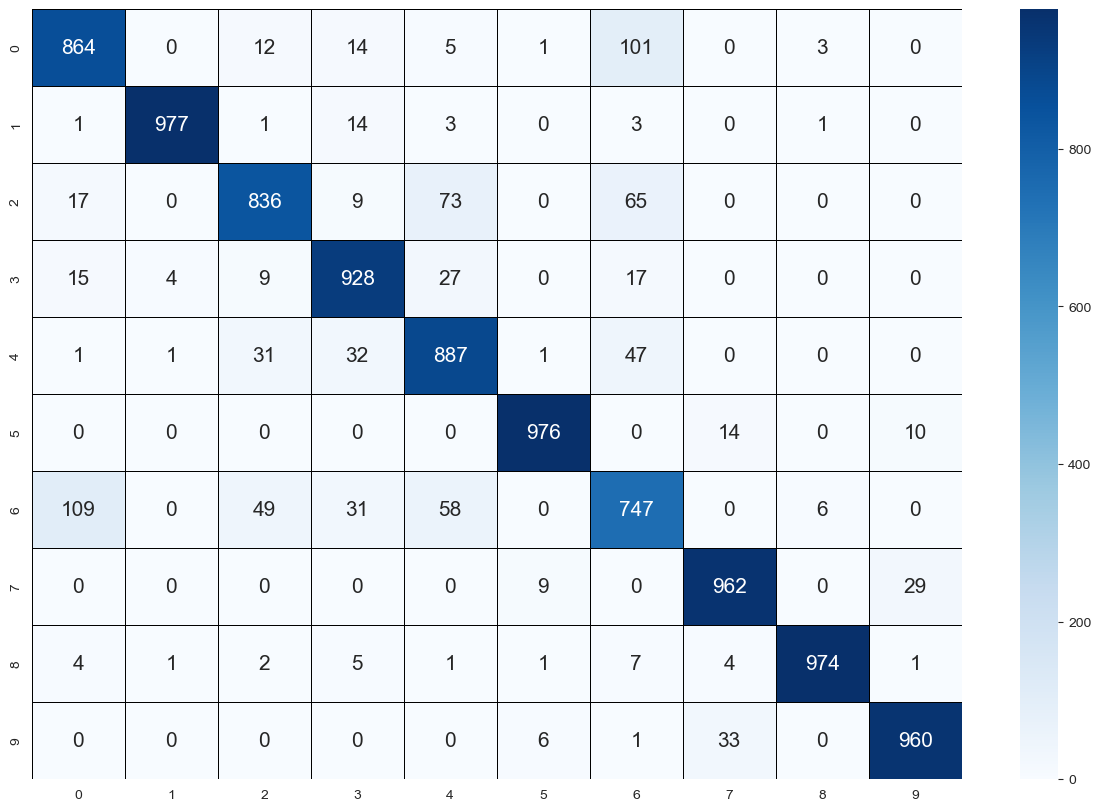

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            cmap="Blues", 
            linewidths=.5, 
            linecolor='black', 
            fmt='g', 
            annot_kws = {"size": 15})


In [41]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [42]:
np.not_equal(y_test, y_pred).sum()

889

In [43]:
np.equal(y_test, y_pred).sum()

9111

## Another Model with different parameters

In [44]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) 

model.add(Flatten()) 

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2240128   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
____________________________________________

In [46]:
model.fit(x_train, y_train_c, batch_size=24, epochs=50, validation_data=(x_test, y_test_c), callbacks=[early_stop]) 

Epoch 1/50
2500/2500 [==============================] - 51s 20ms/step - loss: 0.3706 - accuracy: 0.8704 - val_loss: 0.3202 - val_accuracy: 0.8907
Epoch 2/50
2500/2500 [==============================] - 47s 19ms/step - loss: 0.2595 - accuracy: 0.9094 - val_loss: 0.3012 - val_accuracy: 0.8899
Epoch 3/50
2500/2500 [==============================] - 45s 18ms/step - loss: 0.2300 - accuracy: 0.9190 - val_loss: 0.2982 - val_accuracy: 0.8935
Epoch 4/50
2500/2500 [==============================] - 47s 19ms/step - loss: 0.2114 - accuracy: 0.9266 - val_loss: 0.3396 - val_accuracy: 0.8986
Epoch 5/50
2500/2500 [==============================] - 50s 20ms/step - loss: 0.1967 - accuracy: 0.9315 - val_loss: 0.3016 - val_accuracy: 0.8998
Epoch 6/50
2500/2500 [==============================] - 49s 19ms/step - loss: 0.1880 - accuracy: 0.9351 - val_loss: 0.3093 - val_accuracy: 0.8988
Epoch 7/50
2500/2500 [==============================] - 47s 19ms/step - loss: 0.1767 - accuracy: 0.9384 - val_loss: 0.3293 -

In [47]:
summary2 = pd.DataFrame(model.history.history)
summary2.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.371,0.870,0.320,0.891
1,0.259,0.909,0.301,0.890
2,0.230,0.919,0.298,0.893
3,0.211,0.927,0.340,0.899
4,0.197,0.932,0.302,0.900
5,0.188,0.935,0.309,0.899
6,0.177,0.938,0.329,0.903
7,0.168,0.942,0.337,0.896
8,0.161,0.946,0.361,0.902
9,0.152,0.947,0.350,0.904


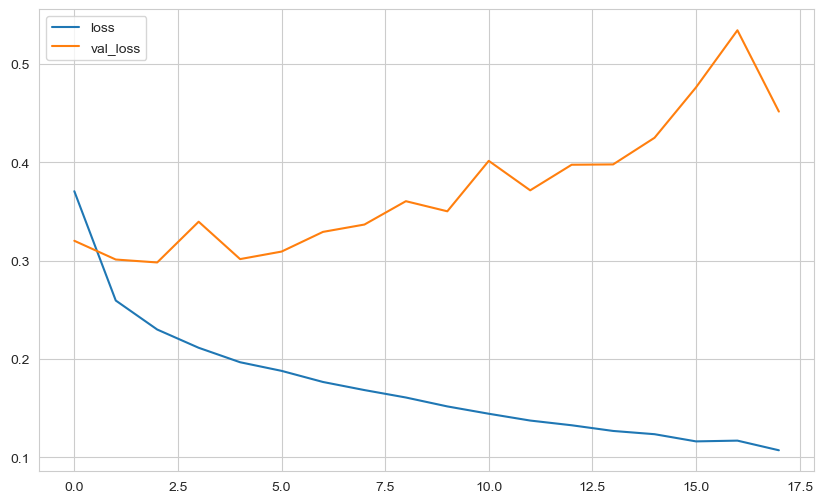

In [48]:
summary2[["loss", "val_loss"]].plot();

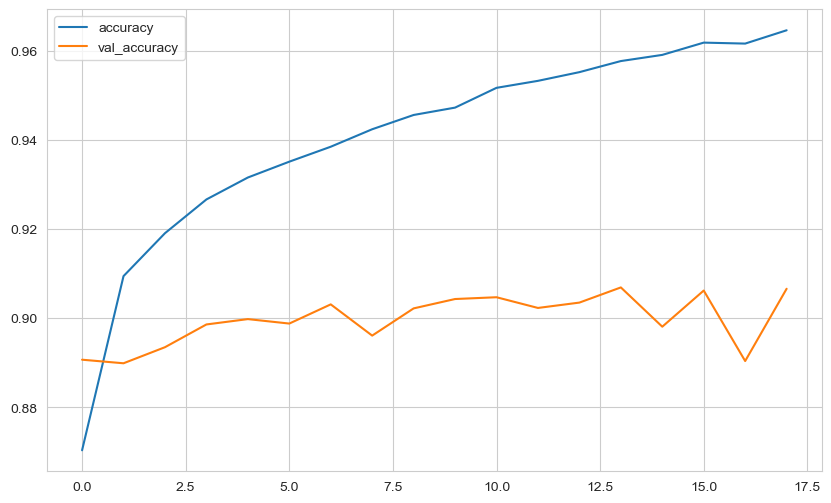

In [49]:
summary2[["accuracy", "val_accuracy"]].plot();

## Prediction

In [50]:
my_shape = x_test[13]
my_shape.shape

(28, 28, 1)

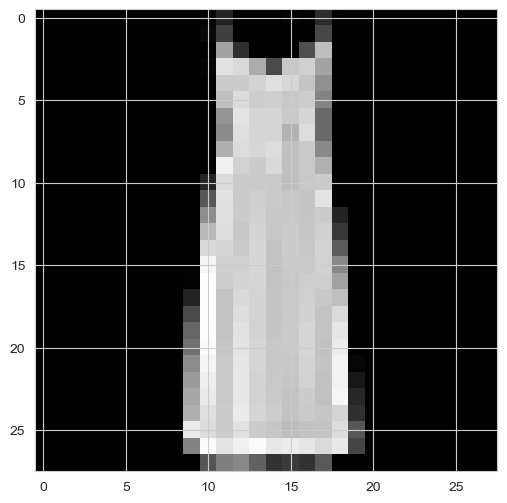

In [51]:
plt.imshow(my_shape, cmap="gray")
plt.show()

In [52]:
pred_prob = model.predict(my_shape.reshape(1,28,28,1)) # only one picture
pred_prob

1/1 [==============================] - 0s 52ms/step


array([[0.00000044, 0.00000003, 0.        , 0.99999857, 0.00000026,
        0.00000005, 0.00000031, 0.        , 0.00000034, 0.        ]],
      dtype=float32)

In [53]:
y_pred = np.argmax(pred_prob)
y_pred

3

In [54]:
model.save("dl_assigment2_cnn.h5")

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___